In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataFixed import GetReports, CreateReportDataframes

reports = GetReports()
dfResult, dfMemory, dfOptimizations = CreateReportDataframes(reports)

In [12]:
# Target device resources available
zcu104 = {
    "LUT": 230400,
    "BRAM": 312,
    "FF": 460800,
    "URAM": 96,
    "DSP": 1728,
}

In [13]:
# Add % utilization
dfResult["BRAM%"] = dfResult["BRAM"] / zcu104["BRAM"] * 100
dfResult["DSP%"] = dfResult["DSP"] / zcu104["DSP"] * 100
dfResult["FF%"] = dfResult["FF"] / zcu104["FF"] * 100
dfResult["LUT%"] = dfResult["LUT"] / zcu104["LUT"] * 100
dfResult["URAM%"] = dfResult["URAM"] / zcu104["URAM"] * 100

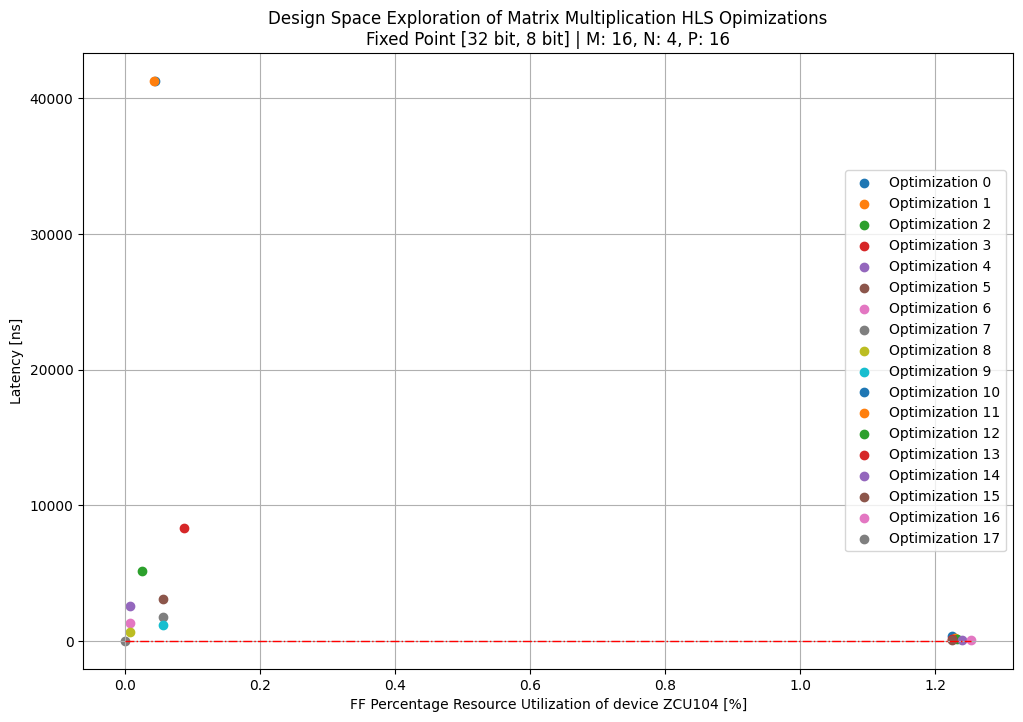

In [14]:
# Configuration
TargetX = "FF%"
TargetY = "Latency_ns"

# Calculation of Pareto Front 
sorted_idx = np.argsort(dfResult[TargetX])
x_sorted = dfResult[TargetX].iloc[sorted_idx]
y_sorted = dfResult[TargetY].iloc[sorted_idx]

## Find lower envelope points
lower_x = [x_sorted.iloc[0]]
lower_y = [y_sorted.iloc[0]]

for xi, yi in zip(x_sorted[1:], y_sorted[1:]):
    if yi < lower_y[-1]:
        lower_x.append(xi)
        lower_y.append(yi)
    else:
        # Keep previous lowest as a “step”
        lower_x.append(xi)
        lower_y.append(lower_y[-1])


# Create figure
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)

# Plot each data point seperately
handles: list[any] = []
for i in range(len(dfResult[TargetY])):
    handles.append(ax.scatter(dfResult[TargetX].iloc[i], dfResult[TargetY].iloc[i], label=dfResult.index[i]))

# Plot calculated Pareto Front
ax.plot(lower_x, lower_y, color='red', linewidth=1, linestyle="-.", label='Lower Barrier')

# Set labels
ax.legend(handles=handles, loc="center right")
ax.set_xlabel("FF Percentage Resource Utilization of device ZCU104 [%]")
ax.set_ylabel("Latency [ns]")
ax.set_title("Design Space Exploration of Matrix Multiplication HLS Opimizations\nFixed Point [32 bit, 8 bit] | M: 16, N: 4, P: 16")

# Enable grid
ax.grid(True)

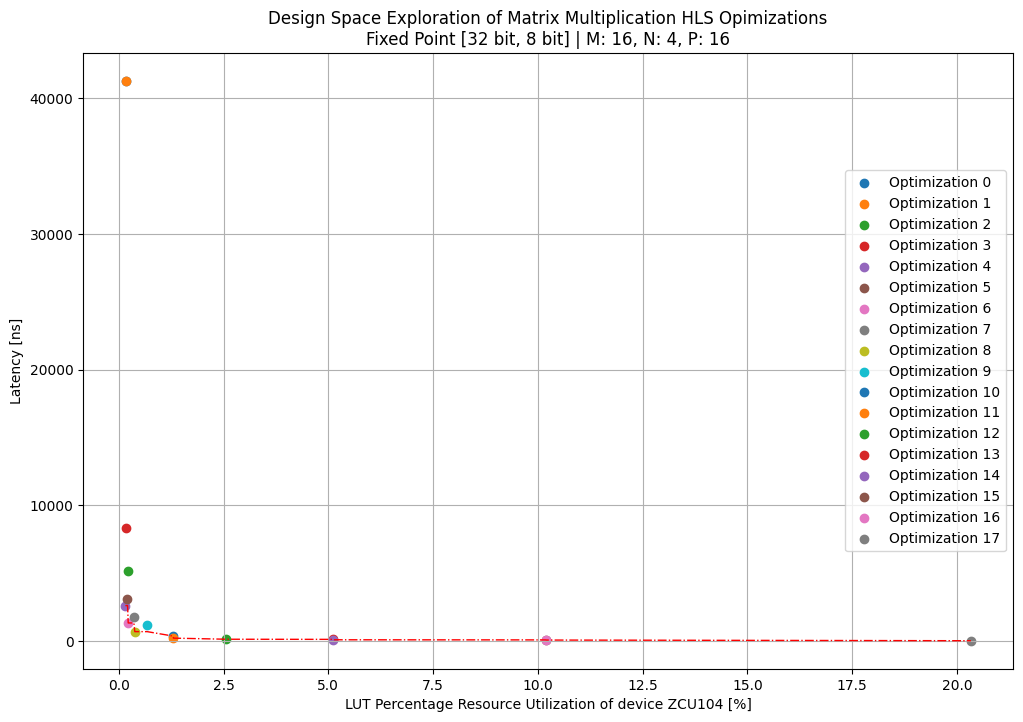

In [15]:
# Configuration
TargetX = "LUT%"
TargetY = "Latency_ns"

# Calculation of Pareto Front 
sorted_idx = np.argsort(dfResult[TargetX])
x_sorted = dfResult[TargetX].iloc[sorted_idx]
y_sorted = dfResult[TargetY].iloc[sorted_idx]

## Find lower envelope points
lower_x = [x_sorted.iloc[0]]
lower_y = [y_sorted.iloc[0]]

for xi, yi in zip(x_sorted[1:], y_sorted[1:]):
    if yi < lower_y[-1]:
        lower_x.append(xi)
        lower_y.append(yi)
    else:
        # Keep previous lowest as a “step”
        lower_x.append(xi)
        lower_y.append(lower_y[-1])


# Create figure
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)

# Plot each data point seperately
handles: list[any] = []
for i in range(len(dfResult[TargetY])):
    handles.append(ax.scatter(dfResult[TargetX].iloc[i], dfResult[TargetY].iloc[i], label=dfResult.index[i]))

# Plot calculated Pareto Front
ax.plot(lower_x, lower_y, color='red', linewidth=1, linestyle="-.", label='Lower Barrier')

# Set labels
ax.legend(handles=handles, loc="center right")
ax.set_xlabel("LUT Percentage Resource Utilization of device ZCU104 [%]")
ax.set_ylabel("Latency [ns]")
ax.set_title("Design Space Exploration of Matrix Multiplication HLS Opimizations\nFixed Point [32 bit, 8 bit] | M: 16, N: 4, P: 16")

# Enable grid
ax.grid(True)

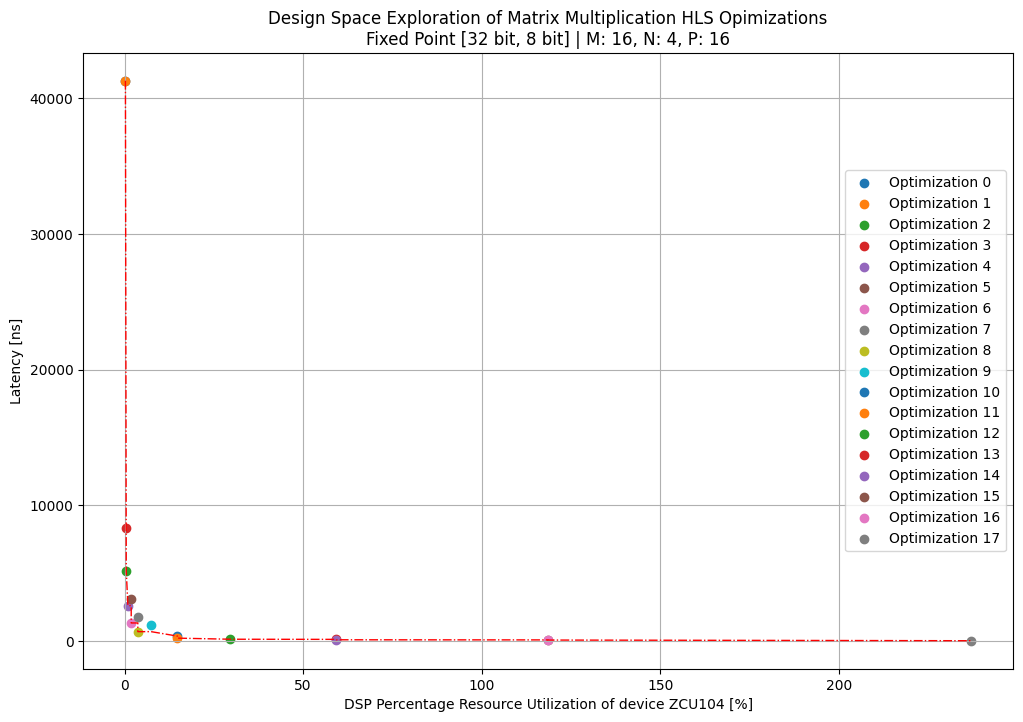

In [16]:
# Configuration
TargetX = "DSP%"
TargetY = "Latency_ns"

# Calculation of Pareto Front 
sorted_idx = np.argsort(dfResult[TargetX])
x_sorted = dfResult[TargetX].iloc[sorted_idx]
y_sorted = dfResult[TargetY].iloc[sorted_idx]

## Find lower envelope points
lower_x = [x_sorted.iloc[0]]
lower_y = [y_sorted.iloc[0]]

for xi, yi in zip(x_sorted[1:], y_sorted[1:]):
    if yi < lower_y[-1]:
        lower_x.append(xi)
        lower_y.append(yi)
    else:
        # Keep previous lowest as a “step”
        lower_x.append(xi)
        lower_y.append(lower_y[-1])


# Create figure
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)

# Plot each data point seperately
handles: list[any] = []
for i in range(len(dfResult[TargetY])):
    handles.append(ax.scatter(dfResult[TargetX].iloc[i], dfResult[TargetY].iloc[i], label=dfResult.index[i]))

# Plot calculated Pareto Front
ax.plot(lower_x, lower_y, color='red', linewidth=1, linestyle="-.", label='Lower Barrier')

# Set labels
ax.legend(handles=handles, loc="center right")
ax.set_xlabel("DSP Percentage Resource Utilization of device ZCU104 [%]")
ax.set_ylabel("Latency [ns]")
ax.set_title("Design Space Exploration of Matrix Multiplication HLS Opimizations\nFixed Point [32 bit, 8 bit] | M: 16, N: 4, P: 16")

# Enable grid
ax.grid(True)

In [17]:
import numpy as np

def minmax(array: np.ndarray):
    assert len(array.shape) == 1

    if np.issubdtype(array.dtype, np.integer):
        minValue = np.iinfo(array.dtype).max # Starts at the max value of type
        maxValue = np.iinfo(array.dtype).min # Starts at the min value of type
    
    if np.issubdtype(array.dtype, np.floating):
        minValue = np.finfo(array.dtype).max # Starts at the max value of type
        maxValue = np.finfo(array.dtype).min # Starts at the min value of type

    for i in range(array.shape[0]):
        if (array[i] < minValue):
            minValue = array[i]
        if (array[i] > maxValue):
            maxValue = array[i]

    return minValue, maxValue


def zNormalize(array: np.ndarray):
    assert len(array.shape) == 1

    # Precompute mean and standard deviation (std) for array.
    mean = np.mean(array)
    std = np.std(array)

    # Perform normlization
    for i in range(array.shape[0]):
        array[i] = (array[i] - mean) / std

    return array

def minMaxNormalize(array: np.ndarray):
    assert len(array.shape) == 1

    minValue, maxValue = minmax(array)

    diff = maxValue - minValue

    for i in range(array.shape[0]):
        array[i] = (array[i] - minValue) / diff

    return array

In [18]:
latency_ns_norm = minMaxNormalize(dfResult["Latency_ns"].to_numpy(dtype=np.float32, copy=True))
ff_norm = minMaxNormalize(dfResult["FF"].to_numpy(dtype=np.float32, copy=True))
lut_norm = minMaxNormalize(dfResult["LUT"].to_numpy(dtype=np.float32, copy=True))

In [19]:
latency_weight = 0.5
resource_weight = 1 - latency_weight

resource_lut_weight = zcu104["LUT"] / (zcu104["LUT"] + zcu104["FF"])
resource_ff_weight = 1 - resource_lut_weight


optimizations: np.ndarray = np.zeros(shape=latency_ns_norm.shape)
cost: np.ndarray = np.zeros(shape=latency_ns_norm.shape)
for i in range(len(cost)):
    cost[i] = latency_ns_norm[i] * latency_weight + resource_weight * (resource_ff_weight * ff_norm[i] + resource_lut_weight * lut_norm[i]) 
    optimizations[i] = i

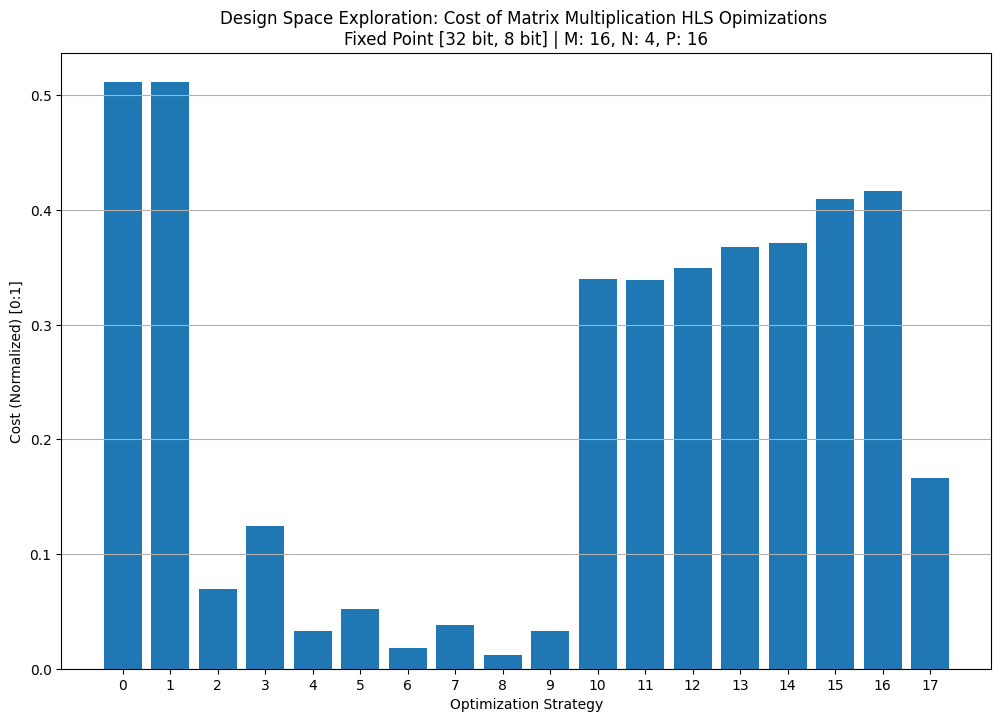

In [20]:
fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

ax.bar(optimizations, cost)
ax.set_xticks(optimizations)
ax.set_xlabel("Optimization Strategy")
ax.set_ylabel("Cost (Normalized) [0:1]")
ax.set_title("Design Space Exploration: Cost of Matrix Multiplication HLS Opimizations \nFixed Point [32 bit, 8 bit] | M: 16, N: 4, P: 16")

#ax.scatter(dfResults["(FF + LUT)%"], dfResults["Latency_ns"])
ax.grid(True, axis="y")

In [31]:
def contains(strings: list[str], match: str):
    for i in range(len(strings)):
        if (strings[i] == match):
            return i
    return -1

dfOptimizations["Unroll - Factor"].notna()

indexes: list[str] = []
labels: list[str] = []
pipelineStrs: list[str] = []
unrollStrs: list[str] = []
dataflowStrs: list[str] = []

for i in range(len(dfOptimizations.index)):
    labels.append(dfOptimizations["Label"].iloc[i])
    techniquesStr = str(dfOptimizations["Techniques"].iloc[i])#.replace("'", "").replace("[", "").replace("]", "").split(",")
    techniques = techniquesStr.replace("'", "").replace("[", "").replace("]", "").replace(" ", "").split(",")

    if contains(techniques, "Pipeline") > -1:
        pipelineStr = "Pipeline "

        if (dfOptimizations["Pipeline - Off"].iloc[i] == True):
            pipelineStr += "OFF "
        
        if (dfOptimizations["Pipeline - II"].iloc[i] != None):
            pipelineStr += "II=" + str(dfOptimizations["Pipeline - II"].iloc[i]) + " "

        if (dfOptimizations["Pipeline - Style"].iloc[i] != None):
            pipelineStr += "style=" + str(dfOptimizations["Pipeline - Style"].iloc[i].name) + " "

        if (dfOptimizations["Pipeline - Rewind"].iloc[i] != None):
            pipelineStr += "rewind=" + str(dfOptimizations["Pipeline - Rewind"].iloc[i]) + " "

        pipelineStrs.append(pipelineStr)
    else:
        pipelineStrs.append("")

    if contains(techniques, "Unroll") > -1:
        unrollStr = "Unroll "

        if (dfOptimizations["Unroll - Off"].iloc[i] == True):
            unrollStr += "OFF "
        if (pd.isna(dfOptimizations["Unroll - Factor"].iloc[i]) == False):
            unrollStr += "factor=" + str(dfOptimizations["Unroll - Factor"].iloc[i]) + " "
        if (dfOptimizations["Unroll - SkipExitCheck"].iloc[i] != None):
            unrollStr += "skipExitCheck=True "

        unrollStrs.append(unrollStr)
    else:
        unrollStrs.append("")
    if contains(techniques, "Dataflow") > -1:
        dataFlowStr = "Dataflow"
        dataflowStrs.append(dataFlowStr)
    else:
        dataflowStrs.append("")

dfOptimizationsFormatted = pd.DataFrame({
    "Label": labels,
    "Pipeline": pipelineStrs,
    "Unroll": unrollStrs,
    "Dataflow": dataflowStrs
}, index=dfOptimizations.index)


In [32]:
print(dfOptimizationsFormatted.to_latex())

\begin{tabular}{lllll}
\toprule
 & Label & Pipeline & Unroll & Dataflow \\
\midrule
Optimization 0 & Function Base & Pipeline OFF  &  &  \\
Optimization 0 & LoopM & Pipeline OFF  &  &  \\
Optimization 0 & LoopP & Pipeline OFF  &  &  \\
Optimization 0 & LoopN & Pipeline OFF  &  &  \\
Optimization 1 & Function Base & Pipeline OFF  &  &  \\
Optimization 1 & LoopM & Pipeline OFF  &  &  \\
Optimization 1 & LoopP & Pipeline OFF  &  &  \\
Optimization 1 & LoopN & Pipeline  &  &  \\
Optimization 2 & Function Base & Pipeline OFF  &  &  \\
Optimization 2 & LoopM & Pipeline OFF  &  &  \\
Optimization 2 & LoopP & Pipeline  &  &  \\
Optimization 2 & LoopN & Pipeline  &  &  \\
Optimization 3 & Function Base & Pipeline OFF  &  &  \\
Optimization 3 & LoopM & Pipeline OFF  &  &  \\
Optimization 3 & LoopP & Pipeline OFF  &  &  \\
Optimization 3 & LoopN & Pipeline OFF  & Unroll  &  \\
Optimization 4 & Function Base & Pipeline OFF  &  &  \\
Optimization 4 & LoopM & Pipeline OFF  &  &  \\
Optimization 4 & 

In [ ]:
print(dfMemory.replace(pd.NA).to_latex())

\begin{tabular}{llrlr}
\toprule
 & Variables & Dim & Type & Factor \\
\midrule
Optimization 5 & B & 2 & cyclic & 2.000000 \\
Optimization 5 & C & 2 & cyclic & 2.000000 \\
Optimization 6 & B & 2 & cyclic & 2.000000 \\
Optimization 6 & C & 2 & cyclic & 2.000000 \\
Optimization 7 & B & 2 & cyclic & 4.000000 \\
Optimization 7 & C & 2 & cyclic & 4.000000 \\
Optimization 8 & B & 2 & cyclic & 4.000000 \\
Optimization 8 & C & 2 & cyclic & 4.000000 \\
Optimization 9 & B & 2 & cyclic & 8.000000 \\
Optimization 9 & C & 2 & cyclic & 8.000000 \\
Optimization 12 & A & 1 & cyclic & 2.000000 \\
Optimization 12 & C & 1 & cyclic & 2.000000 \\
Optimization 13 & A & 1 & cyclic & 4.000000 \\
Optimization 13 & C & 1 & cyclic & 4.000000 \\
Optimization 14 & A & 1 & cyclic & 4.000000 \\
Optimization 14 & C & 1 & cyclic & 4.000000 \\
Optimization 15 & A & 1 & cyclic & 8.000000 \\
Optimization 15 & C & 1 & cyclic & 8.000000 \\
Optimization 16 & A & 1 & cyclic & 8.000000 \\
Optimization 16 & C & 1 & cyclic & 8.0